In [6]:
from matplotlib import pyplot as plt
import math

In [134]:
class Decay:
    def __init__(self, duration, epsilon):
        self.sample_rate = 44100
        self.duration = duration
        self.epsilon = epsilon
        self.num_samples = self.sample_rate * duration
        self.gradient_factor = -math.log(epsilon) / self.duration
        
    def f(self, x):
        return math.exp(-self.gradient_factor * x)
    
    def x_axis(self):
        return [x / self.sample_rate for x in range(0, self.num_samples)]
    
    def ideal_curve(self):
        return [self.f(x) for x in self.x_axis()]
    
    def iterative_curve(self):
        out = []
        x = 1
        for _ in range(0, self.num_samples):
            x_ = x
            out.append(x_)
            dx = (self.gradient_factor * x_) / self.sample_rate
            x -= dx
        return out

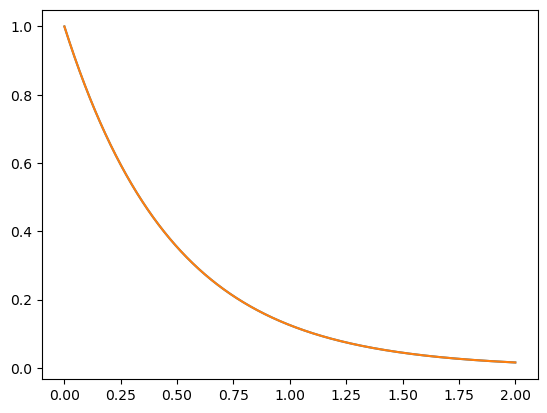

In [135]:
d = Decay(2, 1 / 64)
x = d.x_axis()
y = d.ideal_curve()
y_ = d.iterative_curve()

fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y_)
plt.show()

In [132]:
class Attack:
    def __init__(self, duration):
        self.sample_rate = 44100
        self.cutoff = 2/3
        self.asymptote = 1 / self.cutoff
        self.duration = duration
        self.num_samples = self.sample_rate * duration
        self.gradient_factor = -math.log(1 - self.cutoff) / self.duration
        
    def f(self, x):
        return self.asymptote * (1 - math.exp(-self.gradient_factor * x))
    
    def x_axis(self):
        return [x / self.sample_rate for x in range(0, self.num_samples)]
    
    def ideal_curve(self):
        return [self.f(x) for x in self.x_axis()]
    
    def iterative_curve(self):
        out = []
        x = 0
        for _ in range(0, self.num_samples):
            out.append(x)
            dx = (self.gradient_factor * (self.asymptote - x)) / self.sample_rate
            x += dx
        return out

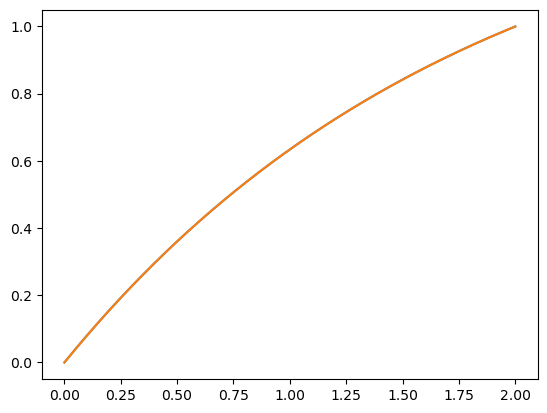

In [133]:
d = Attack(2)
x = d.x_axis()
y = d.ideal_curve()
y_ = d.iterative_curve()

fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y_)
plt.show()

In [80]:
math.log(1.5)

0.4054651081081644